In [1]:
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import nltk
nltk.download('averaged_perceptron_tagger')
from collections import Counter
pd.set_option('display.max_colwidth', 100)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jedbe\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
lbj1_url = 'https://www.espn.com/nba/story/_/id/33569358/lebron-james-having-my-life-right-now-helps-lakers-end-trip-upswing-38-vs-former-team'
lbj2_url = 'https://www.espn.com/nba/story/_/id/29554017/lebron-james-uncertainty-2020-brought-power-social-media-league-restart'
dt1_url = 'https://www.espn.com/olympics/story/_/id/31868732/different-diana-taurasi-arrives-tokyo-olympics'
dt2_url = 'https://www.espn.com/wnba/story/_/id/32427995/diana-taurasi-says-magic-slipped-away-phoenix-mercury-wnba-finals-loss'
sb1_url = 'https://www.espn.com/wnba/story/_/id/33211785/sue-bird-says-fans-helped-sway-decision-play-another-year-seattle-storm'
nba1_url = 'https://www.espn.com/nba/story/_/id/33051655/inside-nba-new-wave-trash-talk-not-really-verbal-assault-used-be'
nbawnba1_url = 'https://www.espn.com/wnba/story/_/id/29762456/wnba-nba-figures-promote-strengthened-bond'
nbafinals18_url = 'https://www.si.com/nba/2018/06/09/golden-state-warriors-greatness-stephen-curry-kevin-durant-nba-finals-game-4-cavs'
wnbafinals18_url = 'https://www.si.com/wnba/2018/09/13/seattle-storm-washington-mystics-wnba-championship-sue-bird-breanna-stewart'
nbafinals17_url = 'https://www.si.com/nba/2017/06/13/golden-state-warriors-dynasty-nba-finals-kevin-durant-stephen-curry'
wnbafinals17_url = 'https://www.si.com/wnba/2017/10/05/wnba-finals-minnesota-lynx-los-angeles-sparks-maya-moore-sylvia-fowles'
lbj1_r = requests.get(lbj1_url)
lbj2_r = requests.get(lbj2_url)
dt1_r = requests.get(dt1_url)
dt2_r = requests.get(dt2_url)
sb1_r = requests.get(sb1_url)
nba1_r = requests.get(nba1_url)
nwba1_r = requests.get(nbawnba1_url)
nbaf18_r = requests.get(nbafinals18_url)
wnbaf18_r = requests.get(wnbafinals18_url)
nbaf17_r = requests.get(nbafinals17_url)
wnbaf17_r = requests.get(wnbafinals17_url)
lbj1_page = BeautifulSoup(lbj1_r.content, 'html.parser')
lbj2_page = BeautifulSoup(lbj2_r.content,'html.parser')
dt1_page = BeautifulSoup(dt1_r.content, 'html.parser')
dt2_page = BeautifulSoup(dt2_r.content,'html.parser')
sb1_page = BeautifulSoup(sb1_r.content,'html.parser')
nba1_page = BeautifulSoup(nba1_r.content,'html.parser')
nwba1_page = BeautifulSoup(nwba1_r.content, 'html.parser')
nbaf18_page = BeautifulSoup(nbaf18_r.content, 'html.parser')
wnbaf18_page = BeautifulSoup(wnbaf18_r.content, 'html.parser')
nbaf17_page = BeautifulSoup(nbaf17_r.content, 'html.parser')
wnbaf17_page = BeautifulSoup(wnbaf17_r.content, 'html.parser')

In [3]:
articles = []
articles.append(lbj1_page.get_text())# [3034:-310]) #short ESPN
articles.append(lbj2_page.get_text())# [3003:-310]) # short ESPN
articles.append(dt1_page.get_text())# [3244:-309]) # medium/long ESPN
articles.append(dt2_page.get_text()) #[3949:-309]) # short ESPN
articles.append(sb1_page.get_text()) #[3291:-310]) # short ESPN
articles.append(nba1_page.get_text()) #[2602:-310]) # short/medium ESPN
articles.append(nwba1_page.get_text()) #[4011:-310]) # short ESPN
articles.append(nbaf18_page.get_text()) #[636:-1832]) # short SI
articles.append(wnbaf18_page.get_text()) #[581:-2054]) # Short SI
articles.append(nbaf17_page.get_text()) #[566:-1778]) # short/medium SI
articles.append(wnbaf17_page.get_text()) #[515:-1782])# short SI

Other Specific Players to look up:  
Kyrie Irving  
Paige Bueckers  
Russell Westbrook  
Candace Parker  
Michael Jordan/Charles Barkley  
Controversial/polarizing WNBA athlete  
Other megastars or news worthy athletes  

Other topics:  
Articles about championship winning/losing teams  
Articles about teams with best/worst records  
Articles about NBA and WNBA as a whole  

In [4]:
df = pd.DataFrame({"Text":articles, "Female":[0,0,1,1,1,0,1,0,1,0,1]})

In [5]:
# This creates an empty list to store the new clean text in
cleantext=[]

# this loops through all the articles in the dataframe df
for i in range(len(df)):
    # This gets the text from the dataframe
    txt=df['Text'][i]
    
    tokens = nltk.word_tokenize(txt)
    lower_tokens = [t.lower() for t in tokens] 
    alpha_only = [t for t in lower_tokens if t.isalpha()]
    no_stops = [t for t in alpha_only if t not in nltk.corpus.stopwords.words('english')]
    
    # These replace the given characters ('\r', '\n', '. ', and ', ' with a space)
    txt=txt.replace('\r',' ')
    txt=txt.replace('\n',' ')
    txt=txt.replace('.  ',' ')
    txt=txt.replace(', ',' ')
    txt=txt.replace("'",'')
    
    # This splits each row on the spaces to create a list of words
    tokens = txt.split(' ')
            
    # This adds the word to the clean text list and joins all the words from the list to reconstruct the 
    # article from the list of words, and it makes them all lowercase
    cleantext.append(" ".join(tokens).lower())
    
# This creates a new column from the list of cleaned articles
df['clean_text']= cleantext

In [6]:
male_list = ['he', 'him', 'his', 'hes', 'nba', 'nbas']
female_list = ['she', 'her', 'hers', 'shes', 'wnba', 'wnbas']

gender_ind = []
word_count = []
top_vbs = []
top_adj = []
for index, item in df.iterrows():
    m_count = 0
    f_count = 0
    tokens = nltk.word_tokenize(item['clean_text'])
    for i in tokens:
        if i in male_list:
            m_count += 1
        elif i in female_list:
            f_count += 1
    
    if f_count >= m_count:
        gender_ind.append(1)
    else:
        gender_ind.append(0)
    
    word_count.append(len(tokens))
    
    tags = nltk.pos_tag(tokens)
    cts = Counter(tags)
    bow = cts.most_common()
    
    adj = []
    vbs = []
    for i in range(len(bow)):
        if "JJ" in bow[i][0][1]:
            adj.append((bow[i][0][0], bow[i][1]))
        elif "VB" in bow[i][0][1]:
            vbs.append((bow[i][0][0], bow[i][1]))
            
    top_vbs.append(vbs[:5])
    top_adj.append(adj[:5])
        
df['F'] = gender_ind
df['words'] = word_count
df['top_verbs'] = top_vbs
df['top_adj'] = top_adj

In [7]:
df

,Text,Female,clean_text,F,words,top_verbs,top_adj
0,"\n\n\n\n\n\n\n\n\n\nLeBron James 'having the time of my life right now,' helps Lakers end trip o...",0,"lebron james having the time of my life right now, helps lakers end trip on upswing wi...",0,1239,"[(said, 9), (is, 7), (having, 6), (has, 5), (need, 4)]","[(i, 6), (nba, 5), (im, 4), (former, 3), (new, 3)]"
1,"\n\n\n\n\n\n\n\n\n\nLeBron James, 'in the uncertainty of what 2020 has brought,' won't power dow...",0,"lebron james in the uncertainty of what 2020 has brought, wont power down social media...",0,1298,"[(is, 11), (said, 10), (be, 9), (has, 7), (playing, 6)]","[(social, 7), (i, 6), (nba, 5), (wont, 3), (nbas, 3)]"
2,\n\n\n\n\n\n\n\n\n\nA different Diana Taurasi arrives at Tokyo Olympics\n\n\n\n\n\n\n\n\n\n\n\n\...,1,a different diana taurasi arrives at tokyo olympics ...,1,7667,"[(was, 86), (says, 44), (be, 38), (is, 38), (has, 30)]","[(i, 36), (more, 12), (good, 12), (taurasi, 11), (last, 11)]"
3,\n\n\n\n\n\n\n\n\n\nDiana Taurasi says 'magic slipped away' from Phoenix Mercury in WNBA Finals ...,1,diana taurasi says magic slipped away from phoenix mercury in wnba finals loss ...,1,1159,"[(said, 9), (was, 9), (been, 8), (womens, 6), (were, 5)]","[(wnba, 5), (i, 5), (ive, 4), (phoenix, 3), (seattle, 2)]"
4,\n\n\n\n\n\n\n\n\n\nSue Bird says fans helped sway her decision to play another year with Seattl...,1,sue bird says fans helped sway her decision to play another year with seattle storm ...,1,1752,"[(was, 16), (said, 14), (is, 14), (be, 11), (has, 6)]","[(last, 7), (seattle, 5), (i, 4), (great, 3), (other, 3)]"
5,\n\n\n\n\n\n\n\n\n\nInside the NBA's new wave of trash talk - 'It's not really a verbal assault ...,0,inside the nbas new wave of trash talk - its not really a verbal assault like it used ...,0,2734,"[(was, 22), (said, 20), (going, 12), (had, 11), (talking, 9)]","[(i, 11), (young, 10), (nba, 7), (new, 6), (trash, 6)]"
6,"\n\n\n\n\n\n\n\n\n\n'It's very important we stay together': WNBA, NBA figures promote strengthen...",1,its very important we stay together: wnba nba figures promote strengthened bond ...,1,1638,"[(have, 12), (is, 11), (been, 8), (are, 8), (womens, 6)]","[(social, 8), (nba, 7), (important, 5), (wnba, 4), (stronger, 3)]"
7,Warriors Win NBA Finals: The Irritating Dynasty - Sports Illustrated\nSkip to main contentApril ...,0,warriors win nba finals: the irritating dynasty - sports illustrated skip to main contentapril 1...,0,1590,"[(was, 17), (is, 6), (were, 5), (’, 5), (be, 4)]","[(golden, 8), (last, 5), (second, 4), (first, 4), (’, 4)]"
8,"Stewart, Storm sweep Mystics for 2018 WNBA Championship - Sports Illustrated\nSkip to main conte...",1,stewart storm sweep mystics for 2018 wnba championship - sports illustrated skip to main content...,1,494,"[(capture, 3), (was, 3), (s, 3), (is, 3), (illustrated, 2)]","[(third, 4), (seattle, 4), (first, 3), (3-0, 2), (’, 2)]"
9,NBA Finals 2017: The NBA Now Belongs To The Warriors - Sports Illustrated\nSkip to main contentA...,0,nba finals 2017: the nba now belongs to the warriors - sports illustrated skip to main contentap...,0,2530,"[(is, 16), (’, 12), (was, 10), (were, 10), (said, 10)]","[(golden, 8), (’, 8), (last, 7), (first, 6), (s, 5)]"


In [8]:
new_stops = text.ENGLISH_STOP_WORDS.union(['his', 'him','her', 'hers', 'he', 'she', 'nba', 'wnba'])
tv = TfidfVectorizer(stop_words=new_stops)
X = tv.fit_transform(df['clean_text'])
features = tv.get_feature_names()

In [9]:
X_dtm = pd.DataFrame(X.toarray(), df.index)
y = df['F']

X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.2, random_state=1680)

# The C values to loop through
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# Empty list to store accuracies
acc = []
# Loop through each C, fit the model, and store the accuracy and C value as a tuple
for c in Cs:
    logit = LogisticRegression(penalty='l1', solver='liblinear', random_state=1680, C=c)
    model = logit.fit(X_train,y_train)
    acc.append((model.score(X_test,y_test), c))
    
print(acc)
# C = 10 gives the best accuracy of 0.7691

[(0.3333333333333333, 0.001), (0.3333333333333333, 0.01), (0.3333333333333333, 0.1), (0.3333333333333333, 1), (0.6666666666666666, 10), (0.6666666666666666, 100), (0.6666666666666666, 1000)]


In [10]:
logit = LogisticRegression(penalty='l1', solver='liblinear', random_state=1680, C=10)
model = logit.fit(X,y)
coefs = model.coef_

# This creates a dataframe with every word and its coefficient
df_coef = pd.DataFrame({'word': features, 'coef': coefs[-1].tolist()})

# This adds a column to the coefficient dataframe that is the absolute value of the coefficient
df_coef['abs coef']= df_coef['coef'].abs()

# This adds a column to the tweet dataframe that is the predicted gender of the tweet
df['pred_gender'] = model.predict(X)

In [11]:
df

,Text,Female,clean_text,F,words,top_verbs,top_adj,pred_gender
0,"\n\n\n\n\n\n\n\n\n\nLeBron James 'having the time of my life right now,' helps Lakers end trip o...",0,"lebron james having the time of my life right now, helps lakers end trip on upswing wi...",0,1239,"[(said, 9), (is, 7), (having, 6), (has, 5), (need, 4)]","[(i, 6), (nba, 5), (im, 4), (former, 3), (new, 3)]",0
1,"\n\n\n\n\n\n\n\n\n\nLeBron James, 'in the uncertainty of what 2020 has brought,' won't power dow...",0,"lebron james in the uncertainty of what 2020 has brought, wont power down social media...",0,1298,"[(is, 11), (said, 10), (be, 9), (has, 7), (playing, 6)]","[(social, 7), (i, 6), (nba, 5), (wont, 3), (nbas, 3)]",0
2,\n\n\n\n\n\n\n\n\n\nA different Diana Taurasi arrives at Tokyo Olympics\n\n\n\n\n\n\n\n\n\n\n\n\...,1,a different diana taurasi arrives at tokyo olympics ...,1,7667,"[(was, 86), (says, 44), (be, 38), (is, 38), (has, 30)]","[(i, 36), (more, 12), (good, 12), (taurasi, 11), (last, 11)]",1
3,\n\n\n\n\n\n\n\n\n\nDiana Taurasi says 'magic slipped away' from Phoenix Mercury in WNBA Finals ...,1,diana taurasi says magic slipped away from phoenix mercury in wnba finals loss ...,1,1159,"[(said, 9), (was, 9), (been, 8), (womens, 6), (were, 5)]","[(wnba, 5), (i, 5), (ive, 4), (phoenix, 3), (seattle, 2)]",1
4,\n\n\n\n\n\n\n\n\n\nSue Bird says fans helped sway her decision to play another year with Seattl...,1,sue bird says fans helped sway her decision to play another year with seattle storm ...,1,1752,"[(was, 16), (said, 14), (is, 14), (be, 11), (has, 6)]","[(last, 7), (seattle, 5), (i, 4), (great, 3), (other, 3)]",1
5,\n\n\n\n\n\n\n\n\n\nInside the NBA's new wave of trash talk - 'It's not really a verbal assault ...,0,inside the nbas new wave of trash talk - its not really a verbal assault like it used ...,0,2734,"[(was, 22), (said, 20), (going, 12), (had, 11), (talking, 9)]","[(i, 11), (young, 10), (nba, 7), (new, 6), (trash, 6)]",0
6,"\n\n\n\n\n\n\n\n\n\n'It's very important we stay together': WNBA, NBA figures promote strengthen...",1,its very important we stay together: wnba nba figures promote strengthened bond ...,1,1638,"[(have, 12), (is, 11), (been, 8), (are, 8), (womens, 6)]","[(social, 8), (nba, 7), (important, 5), (wnba, 4), (stronger, 3)]",1
7,Warriors Win NBA Finals: The Irritating Dynasty - Sports Illustrated\nSkip to main contentApril ...,0,warriors win nba finals: the irritating dynasty - sports illustrated skip to main contentapril 1...,0,1590,"[(was, 17), (is, 6), (were, 5), (’, 5), (be, 4)]","[(golden, 8), (last, 5), (second, 4), (first, 4), (’, 4)]",0
8,"Stewart, Storm sweep Mystics for 2018 WNBA Championship - Sports Illustrated\nSkip to main conte...",1,stewart storm sweep mystics for 2018 wnba championship - sports illustrated skip to main content...,1,494,"[(capture, 3), (was, 3), (s, 3), (is, 3), (illustrated, 2)]","[(third, 4), (seattle, 4), (first, 3), (3-0, 2), (’, 2)]",1
9,NBA Finals 2017: The NBA Now Belongs To The Warriors - Sports Illustrated\nSkip to main contentA...,0,nba finals 2017: the nba now belongs to the warriors - sports illustrated skip to main contentap...,0,2530,"[(is, 16), (’, 12), (was, 10), (were, 10), (said, 10)]","[(golden, 8), (’, 8), (last, 7), (first, 6), (s, 5)]",0


In [12]:
df_coef.sort_values('abs coef', ascending=False).head(20)

,word,coef,abs coef
1685,james,-9.636911,9.636911
3542,warriors,-8.775836,8.775836
3356,trash,-6.191282,6.191282
3219,taurasi,0.965232,0.965232
410,bird,0.170461,0.170461
2454,potential,0.000000,0.000000
2445,possibly,0.000000,0.000000
2446,post,0.000000,0.000000
2447,posted,0.000000,0.000000
2448,postgame,0.000000,0.000000


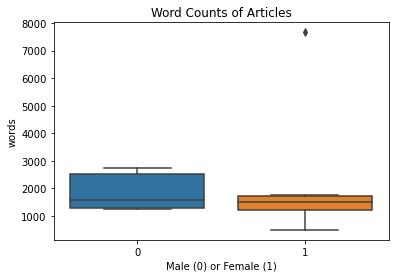

In [13]:
fig = sns.boxplot(x='F', y='words', data=df)
fig.set(title = 'Word Counts of Articles', xlabel='Male (0) or Female (1)')
plt.show()